In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import xgboost as xgb

from sklearn.metrics import roc_auc_score, r2_score, accuracy_score, classification_report

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression #, Lasso 
# from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet

In [3]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectPercentile

In [4]:
train=pd.read_csv("../data/train/databinarystudents_train.csv")
train=train.drop(['id'], axis=1)
train.describe()

,yL,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.666667,63.887836,51.545833,0.316667,0.150000,0.050000,0.091667,0.125000,15.383806,26.425000,...,0.254489,0.037739,6.325000,5.608333,79.625782,0.125000,0.066667,4.108333,0.296166,0.509870
std,0.473381,10.216179,41.591189,0.467127,0.358569,0.218859,0.289765,0.332106,1.952842,15.826614,...,0.352119,0.148418,0.918187,0.972702,50.109709,0.332106,0.250490,2.152957,0.199186,0.306627
min,0.000000,34.217000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,11.107900,0.000000,...,0.000000,0.000000,4.000000,3.000000,11.087400,0.000000,0.000000,1.000000,0.011540,0.023037
25%,0.000000,56.677750,16.075000,0.000000,0.000000,0.000000,0.000000,0.000000,14.282493,22.750000,...,0.002000,0.000000,6.000000,5.000000,44.144175,0.000000,0.000000,2.000000,0.098875,0.190509
50%,1.000000,67.518000,40.650000,0.000000,0.000000,0.000000,0.000000,0.000000,15.382245,31.000000,...,0.033750,0.000100,6.000000,6.000000,70.322450,0.000000,0.000000,4.000000,0.263287,0.493752
75%,1.000000,71.182049,82.975000,1.000000,0.000000,0.000000,0.000000,0.000000,16.608645,37.250000,...,0.455000,0.001525,7.000000,6.000000,105.504000,0.000000,0.000000,6.000000,0.494643,0.816140
max,1.000000,78.836829,173.700000,1.000000,1.000000,1.000000,1.000000,1.000000,20.850060,45.000000,...,0.994200,0.846600,8.000000,7.000000,344.830000,1.000000,1.000000,7.000000,0.662330,0.996328


In [5]:
train.fillna(train.median())

,yL,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
0,1.0,49.856000,118.8,1.0,0.0,0.0,0.0,0.0,16.32096,0.0,...,0.9709,0.0003,6.0,6.0,24.7138,0.0,0.0,7.0,0.056546,0.112860
1,1.0,71.836000,34.8,0.0,0.0,0.0,0.0,1.0,15.00535,44.0,...,0.4200,0.0000,8.0,4.0,38.0658,0.0,0.0,7.0,0.655260,0.886908
2,1.0,66.725000,41.8,0.0,1.0,0.0,0.0,0.0,17.07023,27.0,...,0.9650,0.0000,6.0,6.0,48.3807,0.0,1.0,4.0,0.067855,0.133944
3,0.0,41.696000,132.0,0.0,0.0,1.0,0.0,0.0,16.31460,0.0,...,0.0091,0.0001,6.0,4.0,59.8410,0.0,0.0,7.0,0.133230,0.260102
4,1.0,71.351000,24.2,1.0,0.0,0.0,0.0,0.0,11.10790,31.0,...,0.0051,0.0000,5.0,7.0,175.9250,0.0,0.0,3.0,0.318584,0.627729
5,1.0,71.565000,25.4,0.0,0.0,0.0,1.0,0.0,17.30379,38.0,...,0.0000,0.0000,5.0,7.0,14.9909,1.0,0.0,1.0,0.173189,0.330825
6,1.0,67.879000,42.3,0.0,0.0,0.0,0.0,1.0,15.07912,31.0,...,0.0022,0.0001,7.0,3.0,81.3357,0.0,0.0,5.0,0.219665,0.436101
7,0.0,76.994634,7.6,1.0,0.0,0.0,0.0,0.0,16.65255,45.0,...,0.0094,0.0082,6.0,6.0,31.9150,1.0,0.0,1.0,0.297416,0.558743
8,1.0,75.568293,8.0,0.0,0.0,0.0,0.0,0.0,15.85385,45.0,...,0.0204,0.0000,8.0,4.0,73.9691,1.0,0.0,1.0,0.285290,0.539237
9,1.0,70.705000,19.6,1.0,0.0,0.0,0.0,0.0,12.45424,31.0,...,0.0000,0.0000,6.0,6.0,110.1200,0.0,0.0,2.0,0.292938,0.583095


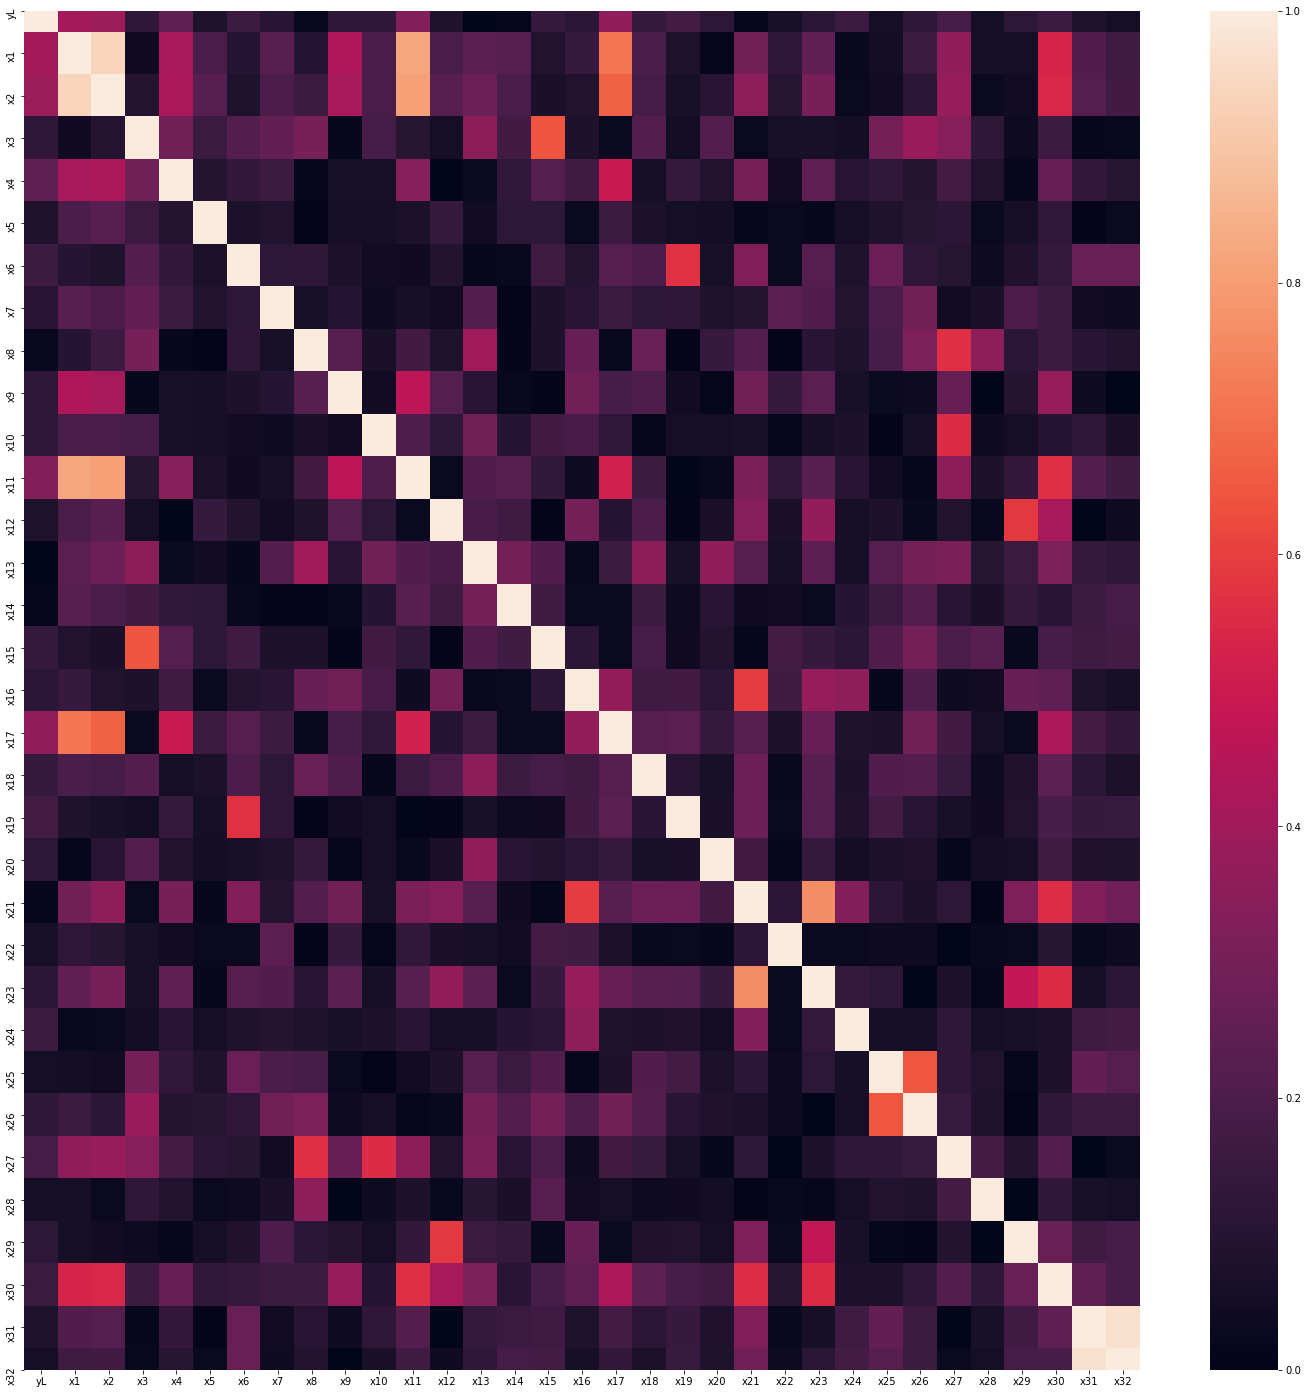

In [6]:
corrmat = train.corr().abs()
fig, ax = plt.subplots()
fig.set_size_inches(25,25)
sns.heatmap(corrmat)

In [8]:
X_train=train.drop(['yL'], axis=1)

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=100)
scaler = StandardScaler()
imputer.fit(X_train)
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train = pd.DataFrame(data=scaler.transform(imputer.transform(X_train)), columns=X_train.columns)
Y_train=train['yL']
X_train.shape, Y_train.shape

((120, 32), (120,))

In [11]:
# X_train.fillna(X_train.median())

In [12]:
numerical_features = ['x1', 'x2', 'x8', 'x10', 'x11','x12','x21','x22','x23','x24','x27','x31','x32']

In [13]:
is_discrete = [i not in numerical_features for i in X_train.columns]

In [14]:
test=pd.read_csv("../data/test/databinarystudents_test.csv")
test=test.drop(['id'], axis=1)
test.describe()

,yL,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.0,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000
mean,0.666667,66.023950,45.650000,0.233333,0.133333,0.0,0.233333,0.0,15.483723,32.266667,...,0.179723,0.011907,6.600000,5.500000,73.965217,0.166667,0.0,3.200000,0.231017,0.415795
std,0.479463,9.323332,40.446472,0.430183,0.345746,0.0,0.430183,0.0,1.865053,12.958643,...,0.344616,0.043501,0.932183,0.937715,38.779101,0.379049,0.0,2.203446,0.163270,0.259449
min,0.000000,46.576000,5.500000,0.000000,0.000000,0.0,0.000000,0.0,10.617270,0.000000,...,0.000000,0.000000,5.000000,3.000000,19.652700,0.000000,0.0,1.000000,0.016302,0.032387
25%,0.000000,59.150500,10.600000,0.000000,0.000000,0.0,0.000000,0.0,14.832670,31.000000,...,0.000450,0.000000,6.000000,5.000000,47.376775,0.000000,0.0,1.000000,0.111470,0.222085
50%,1.000000,69.131585,31.200000,0.000000,0.000000,0.0,0.000000,0.0,15.644320,31.000000,...,0.010950,0.000100,7.000000,6.000000,64.757450,0.000000,0.0,2.000000,0.193432,0.375489
75%,1.000000,73.894391,70.400000,0.000000,0.000000,0.0,0.000000,0.0,16.336905,43.750000,...,0.147500,0.000975,7.000000,6.000000,93.323900,0.000000,0.0,5.000000,0.299916,0.530749
max,1.000000,76.837561,138.200000,1.000000,1.000000,0.0,1.000000,0.0,18.480730,45.000000,...,0.991800,0.216500,9.000000,7.000000,169.289000,1.000000,0.0,7.000000,0.597977,0.986144


In [15]:
X_test=test.drop(['yL'], axis=1)
X_test = pd.DataFrame(data=scaler.transform(imputer.transform(X_test)), columns=X_test.columns)
Y_test=test['yL']
X_test.shape, Y_test.shape

((30, 32), (30,))

In [16]:
mutual_info = mutual_info_classif(X_train, Y_train, discrete_features=is_discrete, random_state=42)

In [17]:
mutual_info_series = pd.Series(data=mutual_info,index=X_train.columns)

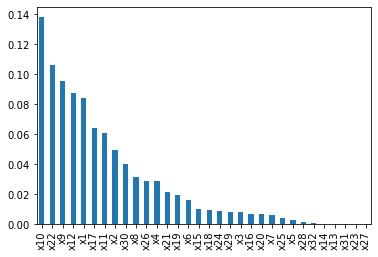

In [18]:
mutual_info_series.sort_values(ascending=False).plot.bar()

In [22]:
percentiles = [10,20,40,60,70,80,85]

param_space = {
    'l1_ratio':[0.01,0.1,0.5,0.7,0.9,0.99],
    'C': [1/0.1, 1/0.5, 1/0.9, 1/1.5, 1/2, 1/3, 1/5, 1/10, 1/100]
}

base_model = LogisticRegression(solver='saga', penalty='elasticnet',random_state=42, max_iter=10000)

grid_search = GridSearchCV(estimator=base_model, param_grid=param_space, scoring='roc_auc', cv=5)

for percentile in percentiles:
    sel_percentile = SelectPercentile(score_func=lambda x,y: mutual_info, percentile=percentile)
    
    sel_percentile.fit(X_train, Y_train)
    
    features = X_train.columns[sel_percentile.get_support()]
    print("Selected features: {}".format(features))
    
    grid_search.fit(X_train[features], Y_train)
    
    y_pred_test = grid_search.predict_proba(X_test[features])[:,1]
    
    auc_score_int = roc_auc_score(Y_test, y_pred_test)
    print('New Test ROC AUC={}'.format((auc_score_int)))


Selected features: Index(['x9', 'x10', 'x12', 'x22'], dtype='object')


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_ite

New Test ROC AUC=0.635
Selected features: Index(['x1', 'x9', 'x10', 'x11', 'x12', 'x17', 'x22'], dtype='object')


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_ite

New Test ROC AUC=0.705
Selected features: Index(['x1', 'x2', 'x4', 'x8', 'x9', 'x10', 'x11', 'x12', 'x17', 'x21', 'x22',
       'x26', 'x30'],
      dtype='object')


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_ite

New Test ROC AUC=0.715
Selected features: Index(['x1', 'x2', 'x4', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x15', 'x17',
       'x18', 'x19', 'x21', 'x22', 'x24', 'x26', 'x29', 'x30'],
      dtype='object')


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_ite

New Test ROC AUC=0.71
Selected features: Index(['x1', 'x2', 'x3', 'x4', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x15',
       'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x24', 'x26', 'x29',
       'x30'],
      dtype='object')


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_ite

New Test ROC AUC=0.71
Selected features: Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x24',
       'x25', 'x26', 'x29', 'x30'],
      dtype='object')


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_ite

New Test ROC AUC=0.695
Selected features: Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x24',
       'x25', 'x26', 'x28', 'x29', 'x30', 'x32'],
      dtype='object')


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_ite

New Test ROC AUC=0.67


In [20]:
sel_percentile.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True])

In [21]:
X_train[sel_percentile.get_support()]

ValueError: Item wrong length 32 instead of 120.